In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
np.random.seed(12345)
def makeline(r, theta, tmin=-1, tmax=1, n=50, noise=0.01):
    #     r=0.5
    #     theta = 30*np.pi/180
    r0 = r*np.array([np.cos(theta), np.sin(theta)])
    rt = np.array([np.cos(theta+np.pi/2), np.sin(theta+np.pi/2)])

    xy = np.array([r0 + rt*t for t in np.linspace(tmin, tmax, n)])
    xy = xy + np.random.randn(n, 2)*noise
    return xy
#uncomment if you wanna cheat
xy1 = makeline(0.5, 30*np.pi/180)
#plt.plot(xy1[:,0], xy1[:,1], '.')
xy2 = makeline(0.7, -20*np.pi/180)
#plt.plot(xy2[:,0], xy2[:,1], '.')
xy3 = makeline(0, -20*np.pi/180)
#plt.plot(xy3[:,0], xy3[:,1], '.')
xy4 = makeline(0, 30*np.pi/180)
#plt.plot(xy4[:,0], xy4[:,1], '.')

data = np.vstack([xy1, xy2, xy3, xy4])
np.random.shuffle(data)


# Hough Transform(Line Version)

Can you find equation of the lines in this pic(programatically)???

Can you find the corners?

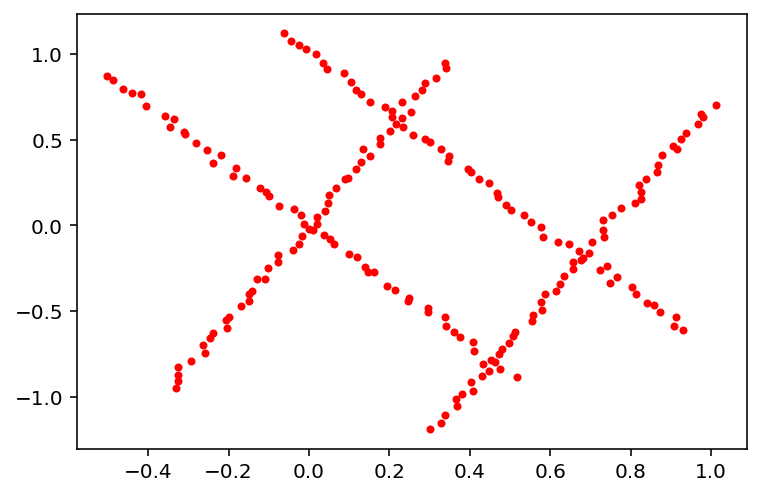

In [4]:
plt.plot(data[:, 0], data[:, 1], '.r')

## Convince your self that a line can be parametrize by $r$ and $\theta$. Write a parametric equation for the line.

## Draw a line with $r=2$, $\theta=30\deg$

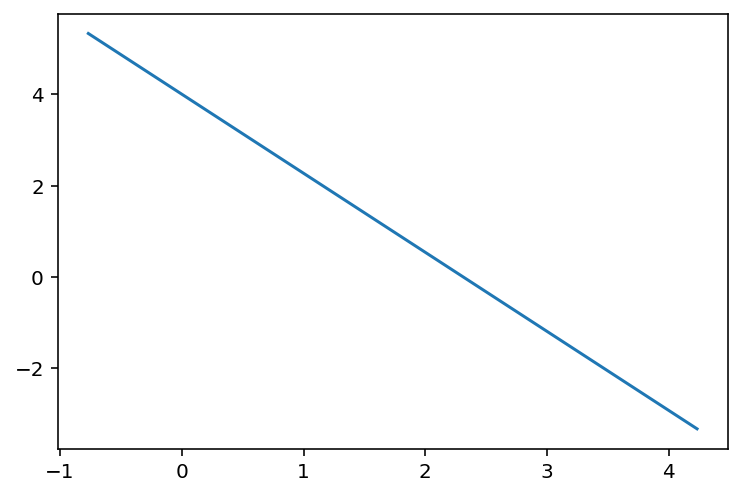

In [5]:
def line(r, theta, min_t, max_t):
    ts = np.linspace(min_t, max_t, 100)
    xs = r*np.cos(theta) - ts*np.sin(theta)
    ys = r*np.sin(theta) + ts*np.cos(theta)
    return xs, ys

xs, ys = line(2, np.pi/6, -5, 5)
plt.plot(xs, ys)

## For a point (x,y) what is the set of $r$ and $\theta$ for line that passes through point x and y.

0.2635487588287874 0.7517544491285741


Text(0, 0.5, 'r')

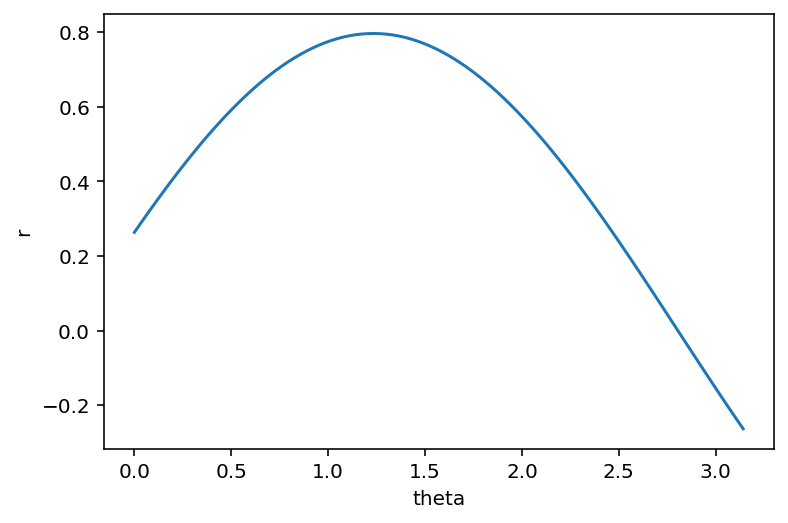

In [18]:
import math

x, y = data[0]
print(x,y)

def line_through_point(x, y): # rs, thetas
    thetas = np.linspace(0, np.pi, 100)
    length = np.sqrt(x**2 + y**2)
    beta = math.atan2(y, x)
    rs = length * np.cos(beta - thetas)
    return rs, thetas

rs, thetas = line_through_point(x, y)
plt.plot(thetas, rs)
plt.xlabel('theta')
plt.ylabel('r')



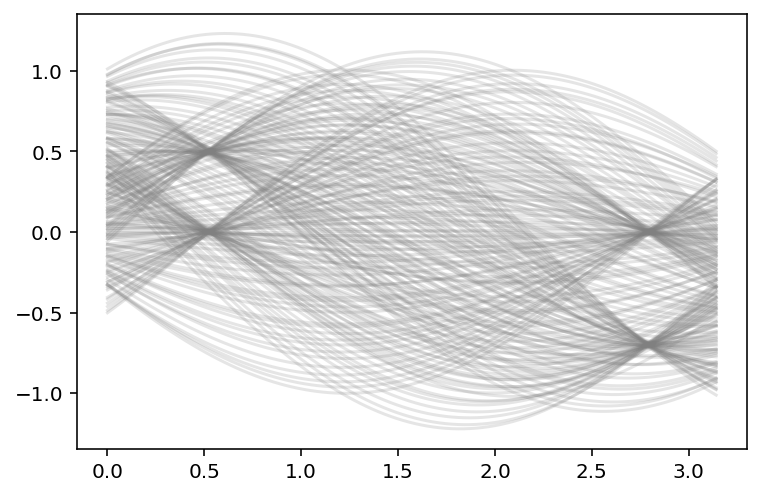

In [20]:
for d in data:
    x, y = d
    rs, thetas = line_through_point(x, y)
    plt.plot(thetas, rs, color='gray', alpha=0.2)

[[16, 49], [17, 70], [88, 21], [88, 49]]


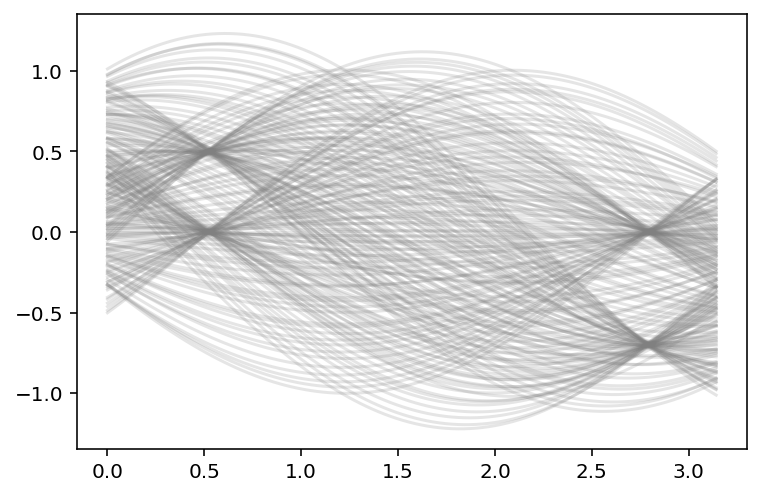

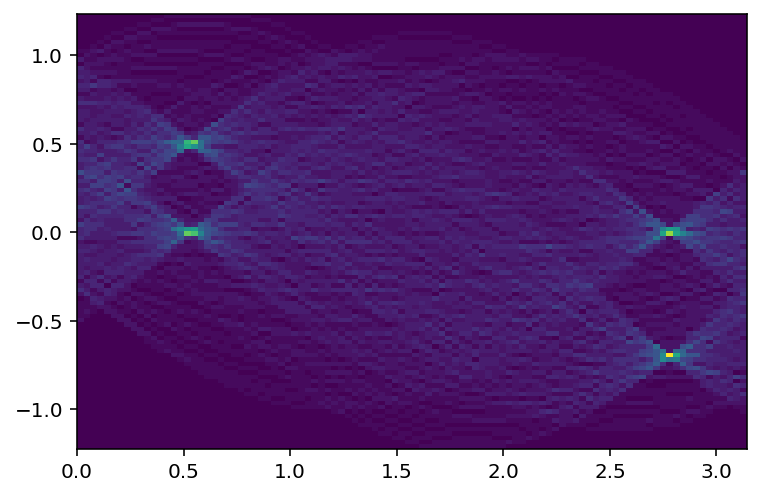

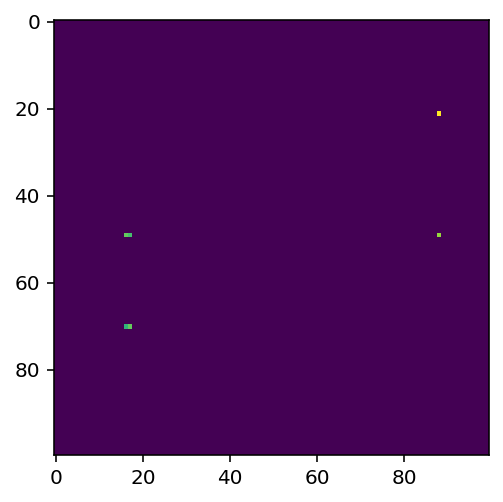

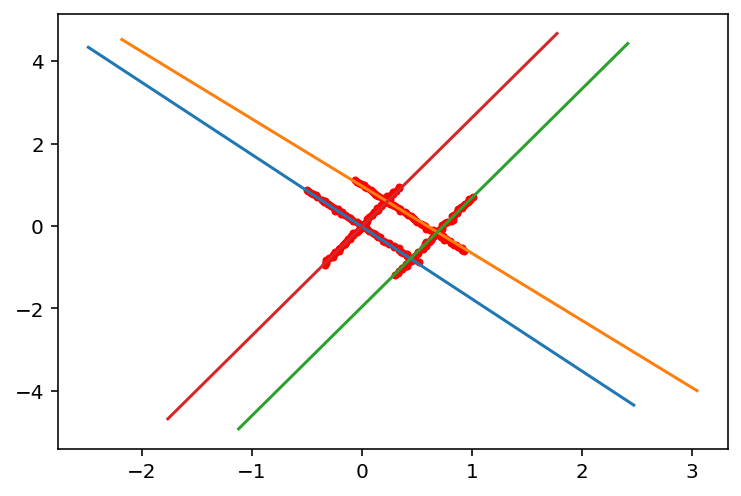

In [57]:
all_rs = []
all_thetas = []
for d in data:
    x, y = d
    rs, thetas = line_through_point(x, y)
    all_rs.extend(rs)
    all_thetas.extend(thetas)
    plt.plot(thetas, rs, color='gray', alpha=0.2)
    
plt.figure()
h, ex, ey,_ = plt.hist2d(all_thetas,all_rs, bins=100);
# histogram, edge


h[h<25] = 0
plt.figure()
plt.imshow(h.T)


local_maxes = []
for ix, iy in np.ndindex(h.shape):
    if h[ix, iy] > 25:
        if np.all(h[ix, iy] >= h[ix-3:ix+3, iy-3:iy+3]):
            local_maxes.append([ix,iy])
print(local_maxes)

plt.figure()
plt.plot(data[:, 0], data[:, 1], '.r')
for max_ix, max_iy in local_maxes:
    theta = (ex[max_ix]+ex[max_ix+1])/2
    r = (ey[max_iy]+ey[max_iy+1])/2
    xs, ys = line(r, theta, -5, 5)
    plt.plot(xs,ys)
    



# plt.figure()
# plt.plot(data[:, 0], data[:, 1], '.r')
# xs, ys = line(r, theta, -5, 5)
# plt.plot(xs,ys)


## Accumulate the $r$ and $\theta$ for all the data points and make a 2d histogram.

In [22]:
6e5/6e9

0.0001

## Find the peaks. Easiest way is to just find x>threshold and x is the max within certain window.

## Draw the lines given the peak parameter

# Hough Transform Circle Version.

We can use voting mechanism to actually find any decently-defined geometry

In [70]:
np.random.seed(999)
def make_circle(x, y, r, noise=0.01):
    thetas = np.linspace(0, 2*np.pi, 100)
    ret = [np.array([x, y]) + (r+noise*np.random.randn())*np.array([np.cos(t), np.sin(t)]) for t in thetas]
    return np.array(ret)

c1 = make_circle(1, 1.5, 0.3)
#plt.plot(c1[:,0], c1[:,1], '.')
c2 = make_circle(2, 1, 0.3)
#plt.plot(c2[:,0], c2[:,1], '.')
c3 = make_circle(1, 0.5, 0.1)
#plt.plot(c3[:,0], c3[:,1], '.')
#plt.gca().set_aspect(1)

data = np.vstack([c1, c2, c3])
np.random.shuffle(data)

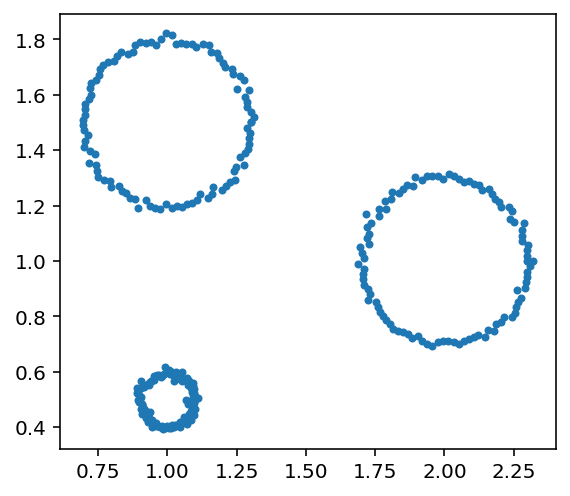

In [71]:
plt.plot(data[:,0], data[:, 1], '.')
plt.gca().set_aspect(1)

## How do we parametrize a circle?

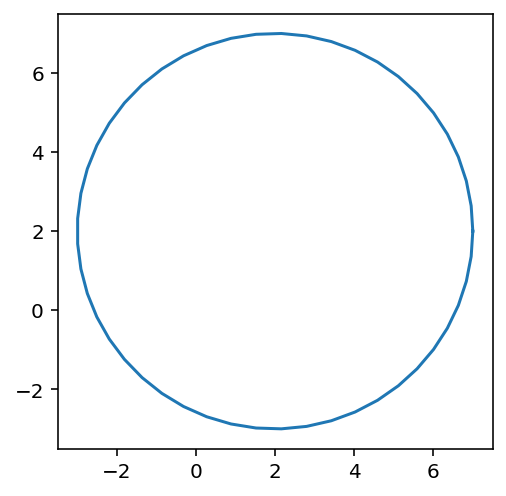

In [111]:
def circle(cx, cy, r):
    thetas = np.linspace(0, 2*np.pi)
    xs = cx + r*np.cos(thetas)
    ys = cy + r*np.sin(thetas)
    return xs, ys
xs, ys = circle(2,2, 5)
plt.plot(xs, ys)
plt.gca().set_aspect(1)

# https://numpy.org/doc/stable/reference/generated/numpy.histogramdd.html

def all_circle_pass_through_point(x, y): # [cx, cy, r]
    cx = np.linspace(0,2.5, 100)
    cy = np.linspace(0,2, 100)
    cxs, cys = np.meshgrid(cx, cy)
    rs = np.sqrt((cxs-x)**2 + (cys-y)**2)
    return cxs, cys, rs

def vote(all_cxs, all_cys, all_rs):
    #print(np.array([all_cxs, all_cys, all_rs]).shape)
    h, (ex, ey, er) = np.histogramdd(np.array([all_cxs, all_cys, all_rs]).T, bins=100)
    return h, ex, ey, er

    



In [112]:
all_cxs=[]
all_cys=[]
all_rs=[]
for point in data:
    x, y = point
    cxs, cys, rs = all_circle_pass_through_point(x, y)
    all_cxs.append(cxs)
    all_cys.append(cys)
    all_rs.append(rs)
all_cxs = np.array(all_cxs).flatten()
all_cys = np.array(all_cys).flatten()
all_rs =np.array(all_rs).flatten()
print(len(all_cxs), len(all_cys))

3000000 3000000


In [113]:
np.random.randn(100,3).shape

(100, 3)

In [114]:
h, ex, ey, er = vote(all_cxs, all_cys, all_rs)
print(h.shape)

(100, 100, 100)


In [115]:
print(np.max(h))
np.argmax(h)

70.0


795011

In [118]:
local_maxes = []
for ix, iy, ir in np.ndindex(h.shape):
    if h[ix, iy, ir] > 50:
        if np.all(h[ix, iy, ir] >= h[ix-3:ix+3, iy-3:iy+3, ir-3:ir+3]):
            local_maxes.append([ix,iy,ir])
print(local_maxes)



[[39, 74, 11], [40, 25, 3], [79, 50, 11]]


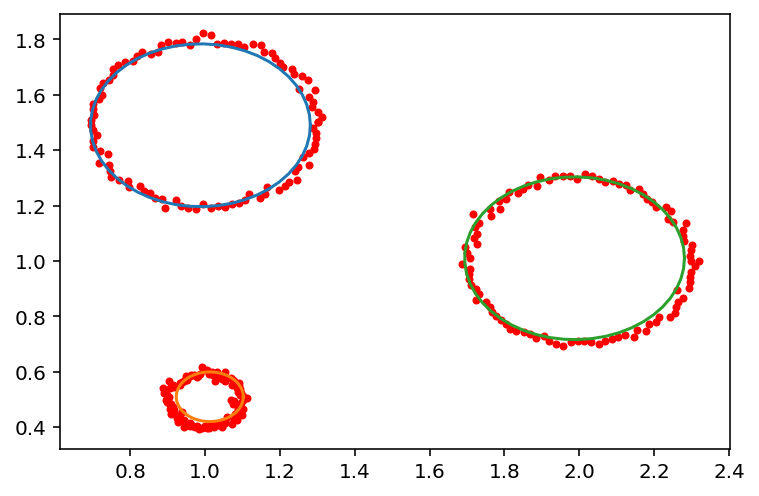

In [120]:
plt.figure()
plt.plot(data[:, 0], data[:, 1], '.r')
for max_ix, max_iy, max_ir in local_maxes:
    x = (ex[max_ix]+ex[max_ix+1])/2
    y = (ey[max_iy]+ey[max_iy+1])/2
    r = (er[max_ir]+er[max_ir+1])/2
    xs, ys = circle(x, y, r)
    plt.plot(xs,ys)

## Given a point x,y what are the set of the parameter for the circle that pass through it.

## Accumulate

## Find Peak

## Draw the Circle... We can also use this to count the circle.